<a href="https://colab.research.google.com/github/JackyXu866/Project-in-ML-AI/blob/main/hw2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Import
The data i am using is the data set that I have already processed in 
[HW1](https://github.com/JackyXu866/Project-in-ML-AI/blob/main/hw1.ipynb), which
I just import the processed version here.

In [1]:
# Import Library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
import sklearn.tree as tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import BaggingClassifier
import graphviz
import time
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('/content/KRmatch_proc.csv')

In [3]:
# See if the correct data is imported
df.head()

d_spell  f_spell  role  assists  damage_objectives  damage_building  \
0       14        4     4        6                  0                0   
1       11        4     1        8                547            46480   
2       14        4     4        2                168              444   
3       14        4     2        8               2492             3082   
4        4       12     0        8               6419             7408   

   damage_turrets  deaths  gold_earned       kda  kills  level  time_cc  \
0               0       6         6043  1.333333      2      9       23   
1             547       3        12919  6.666667     12     16       32   
2             168       7         5641  0.285714      0     10       22   
3            2492       3        10688  5.000000      7     14       29   
4            6419       5        12368  4.200000     13     15       25   

   damage_total  damage_taken  total_minions_killed  turret_kills  \
0         15214          9404                    36             0   
1        194463         25782                    23             1   
2         34038         14079                    26             0   
3         94369         11128                   133             2   
4        110580         20404                   141             2   

   vision_score  result  
0            47   False  
1            20    True  
2            38   False  
3            17    True  
4            24    True

In [4]:
# independent variables
x = df.drop(['result'], axis=1)
# dependent/target variable
y = df.result

# divide data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [5]:
x.columns

Index(['d_spell', 'f_spell', 'role', 'assists', 'damage_objectives',
       'damage_building', 'damage_turrets', 'deaths', 'gold_earned', 'kda',
       'kills', 'level', 'time_cc', 'damage_total', 'damage_taken',
       'total_minions_killed', 'turret_kills', 'vision_score'],
      dtype='object')

# Task 1 - Decision Tree Classifier

I tested Decision Tree Classifier with two criterion, gini and entropy.
Both give a quite similiar result with Gini win by only a tiny amount.

By comparing the graph of the tree for both criterion (shown below): 
![Compare](https://github.com/JackyXu866/Project-in-ML-AI/blob/main/content/gve.png?raw=true)
I can see that there are more stuff going on using the entropy criterion.
However, the overall structure of both tree looks similiar. The depth
and width of both trees are the same.

However, by analyzing the formula:

$Entropy(S)= -p log_2p -q log_2q$

$Gini Index= 1-∑_jP_j^2$

and the graph, we can tell that entropy varies from 0.0 to 1.0, 
while gini varies from 0.0 to 0.5. Although not shown for my dataset,
since that all run at 0 sec, we can tell that using Gini could
reduce the computational power than entropy, because the range of 
variants is lower.

I have also tried the default (best) splitter method and the random
splitter method. With multiple runs on both methods. The result on
default splitter methods reamin stable and higher than any of the results
from random splitter methods. And the random splitter methods' result
would vary by ~0.02, which is a lot.

In [6]:
def get_score(y_test, y_pred):  
  # overall acuracy of the model
  print(accuracy_score(y_test, y_pred))
  # f1 score of the model
  print(f1_score(y_test, y_pred))

## Defualt - Gini

In [7]:
# default - gini
time_s = time.time()
dtc = tree.DecisionTreeClassifier()
dtc = dtc.fit(x_train, y_train)
"time:", (time.time()-time_s)

('time:', 0.057901620864868164)

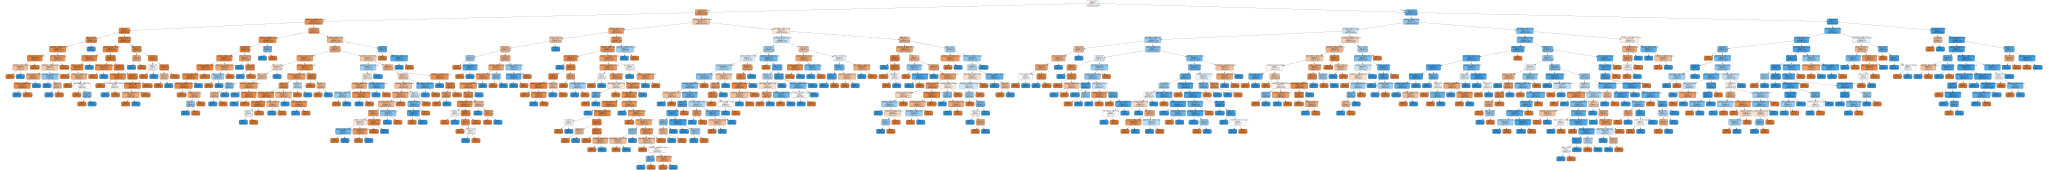

In [8]:
dot_data = tree.export_graphviz(dtc, out_file=None, 
                      feature_names=x.columns, 
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data) 
graph.render("gini")
graph

In [9]:
y_pred_gini = dtc.predict(x_test)
get_score(y_pred_gini, y_test)

0.7853801169590643
0.7793144918821406


In [10]:
# evaluate using k-fold
cv_dtc = RepeatedStratifiedKFold(random_state=1)
n_scores_dtc = cross_val_score(dtc, x_test, y_test, scoring='accuracy', cv=cv_dtc, n_jobs=-1, error_score='raise')
'Accuracy: %.3f (%.3f)' % (np.mean(n_scores_dtc), np.std(n_scores_dtc))

'Accuracy: 0.774 (0.021)'

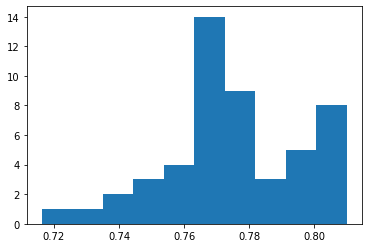

In [11]:
fig, ax = plt.subplots()
ax.hist(n_scores_dtc)
plt.show()

## Random - Gini

In [12]:
dtc_r = tree.DecisionTreeClassifier(splitter="random")
dtc_r = dtc_r.fit(x_train, y_train)

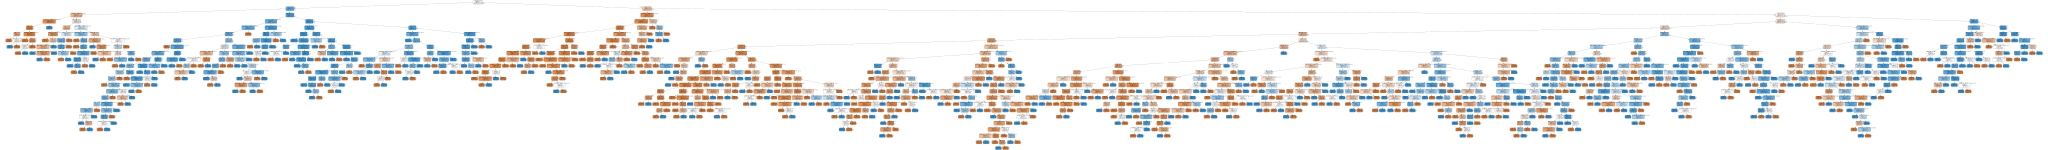

In [13]:
dot_data_r = tree.export_graphviz(dtc_r, out_file=None, 
                      feature_names=x.columns, 
                      filled=True, rounded=True,  
                      special_characters=True)  
graph_r = graphviz.Source(dot_data_r) 
graph_r

In [14]:
y_pred_gini_r = dtc_r.predict(x_test)
get_score(y_pred_gini_r, y_test)

0.7935672514619883
0.7879879879879879


## Default - entropy

In [15]:
time_s = time.time()
dtc_entro = tree.DecisionTreeClassifier(criterion="entropy")
dtc_entro = dtc_entro.fit(x_train, y_train)
"time:", (time.time()-time_s)

('time:', 0.0986030101776123)

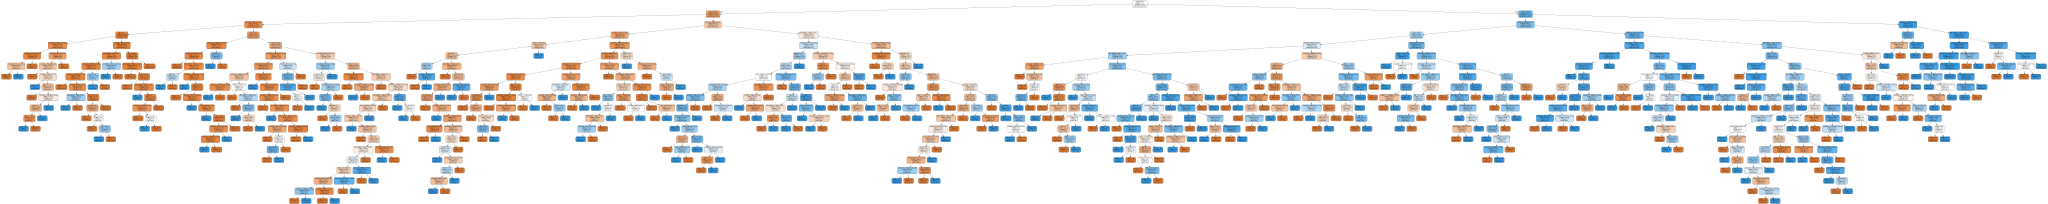

In [16]:
dot_data_entro = tree.export_graphviz(dtc_entro, out_file=None, 
                      feature_names=x.columns, 
                      filled=True, rounded=True,  
                      special_characters=True)  
graph_entro = graphviz.Source(dot_data_entro) 
graph_entro.render("entropy")
graph_entro

In [17]:
y_pred_entro = dtc_entro.predict(x_test)
get_score(y_pred_entro, y_test)

0.8023391812865497
0.7958937198067632


## Random - entropy

In [18]:
dtc_entro_r = tree.DecisionTreeClassifier(criterion="entropy", splitter="random")
dtc_entro_r = dtc_entro_r.fit(x_train, y_train)

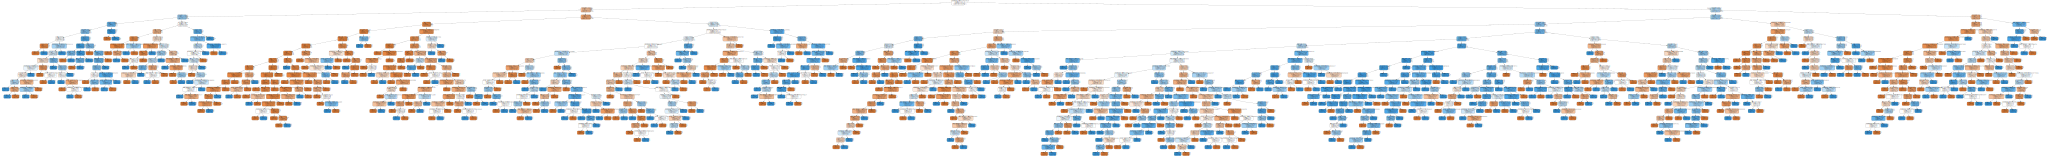

In [19]:
dot_data_entro_r = tree.export_graphviz(dtc_entro_r, out_file=None, 
                      feature_names=x.columns, 
                      filled=True, rounded=True,  
                      special_characters=True)  
graph_entro_r = graphviz.Source(dot_data_entro_r) 
graph_entro_r

In [20]:
y_pred_entro_r = dtc_entro_r.predict(x_test)
get_score(y_pred_entro_r, y_test)

0.7824561403508772
0.7753623188405797


# Task 2 - Bagging & Boosting

Parameters: For both models, Decision Tree is used as base estimator, and the
number of base estimators are the same at 100.

For advanced testing, I have another 2 tests where the number of estimators 
are at 10, and keep everything else the same.

From testing below, the overall accuracy from both models are similiar evaluated by Stratified K-fold. One slight difference is that the accuracy of
bagging method is a tiny bit higher than boosting, and the standard deviation
is also a bit higher.

When testing with lower number of estimators, the result does not change much,
the accuracy of bagging still wins by a bit.

However, the time for bagging is significantly higher than boosting.

## Bagging
Decision Tree Bagging

In [34]:
time_s = time.time()
bag = BaggingClassifier(n_estimators=100)
bag = bag.fit(x_train, y_train)
"time:", (time.time()-time_s)

('time:', 3.1461126804351807)

In [22]:
y_pred_bag = bag.predict(x_test)
get_score(y_test, y_pred_bag)

0.8467836257309942
0.8412121212121212


In [23]:
# evaluate using k-fold
cv = RepeatedStratifiedKFold(random_state=1)
n_scores = cross_val_score(bag, x_test, y_test, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
'Accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores))

'Accuracy: 0.834 (0.019)'

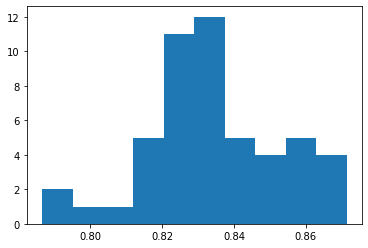

In [24]:
fig, ax = plt.subplots()
ax.hist(n_scores)
plt.show()

### Lower n_estimators

In [25]:
bag1 = BaggingClassifier(n_estimators=10)
bag1 = bag1.fit(x_train, y_train)

In [26]:
# evaluate using k-fold
cv1 = RepeatedStratifiedKFold(random_state=1)
n_scores1 = cross_val_score(bag1, x_test, y_test, scoring='accuracy', cv=cv1, n_jobs=-1, error_score='raise')
'Accuracy: %.3f (%.3f)' % (np.mean(n_scores1), np.std(n_scores1))

'Accuracy: 0.819 (0.019)'

## Boosting
Ada Boosting

In [27]:
from sklearn.ensemble import AdaBoostClassifier
time_s = time.time()
boo = AdaBoostClassifier(n_estimators=100)
boo = boo.fit(x_train, y_train)
"time:", (time.time()-time_s)

('time:', 0.8186435699462891)

In [28]:
y_pred_boo = boo.predict(x_test)
get_score(y_test, y_pred_boo)

0.8450292397660819
0.8398791540785498


In [29]:
# evaluate using k-fold
cvb = RepeatedStratifiedKFold(random_state=1)
n_scoresb = cross_val_score(boo, x_test, y_test, scoring='accuracy', cv=cvb, n_jobs=-1, error_score='raise')
'Accuracy: %.3f (%.3f)' % (np.mean(n_scoresb), np.std(n_scoresb))

'Accuracy: 0.832 (0.020)'

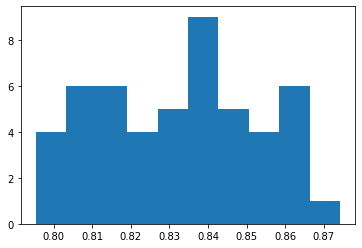

In [30]:
fig, ax = plt.subplots()
ax.hist(n_scoresb)
plt.show()

### Lower n_estimators

In [31]:
boo1 = AdaBoostClassifier(n_estimators=10)
boo1 = boo1.fit(x_train, y_train)

In [32]:
cvb1 = RepeatedStratifiedKFold(random_state=1)
n_scoresb1 = cross_val_score(boo1, x_test, y_test, scoring='accuracy', cv=cvb1, n_jobs=-1, error_score='raise')
'Accuracy: %.3f (%.3f)' % (np.mean(n_scoresb1), np.std(n_scoresb1))

'Accuracy: 0.811 (0.022)'

# Task 3 - Compare Models
For comparison, I used 4 metrics, which are Time, Accracy Score,
F1 Score, and K-fold cross validation effectiveness.

Graph shown below.

**Time**: Time is a big consideration factor when it comes to personal
machine learning model. When 2 models with close accuracy, we definitely
going to choose the one with lower time cost, even if the accuracy is
a bit lower. We do not have infinite amount of time to waste. For these
three models, bagging takes too much time and does not provide a huge
accuracy improvement, so we probably don't want to use it for this dataset.

**Accuracy Score**: The percentage of the prediction result is correct.
Of course, we want our model to perdict a better result. So this is
also important for consideration. Although with least amount of time 
taken, Decision Tree does not provide a good accuracy.

**F1 Score**: This takes in consideration of precision and recall. It
basically give out the quality of the model. Same as the accuracy 
score, decision tree failed to achieve a good result on it.

**K-fold Cross Validation**: It is used to estimate the skill of 
model on new dataset. Since we are not going to use the same dataset
for real-time usage, we want the model to be adaptive.

From all 4 metrics above, I think for this problem, Ada Boosting is
the best model out of these three. Although with a little bit lower
accuracy, F1 and K-fold score (too small to take in consideration) 
than Bagging, the model time has a great advantage over bagging. 

|         | Decision Tree | Bagging | Ada Boosting |
|:-----------------:|:---------------:|:---------:|:---------------:|
| Time (s)    |   0.0579   |  3.146 |   0.819   |
| Accuracy Score |   0.785   |  0.847 |   0.845   |
|  F1 Score   |   0.779   |  0.841 |   0.840   |
| K-fold Score  |0.774 (0.021) |0.834 (0.019)|0.811 (0.022) |   
